<a href="https://colab.research.google.com/github/FabianaAlbuquerque97/AI-Fuzzy-Systems-and-Bayesian-Prediction/blob/main/Controle_Fuzzy_do_Chuveiro_(Scikit_Fuzzy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Controle Fuzzy do Chuveiro (Scikit-Fuzzy)

Trabalho de Inteligência Artificial - Questão 1

In [ ]:
# Instalação do Scikit-Fuzzy
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.4 MB/s eta 0:00:00


In [ ]:
# Controle Fuzzy de Temperatura de Chuveiro usando Scikit-Fuzzy

# ---------------------------------------
# 1. Importação das Bibliotecas Necessárias
# ---------------------------------------
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


In [ ]:
# ---------------------------------------
# 2. Definição do Problema
# ---------------------------------------
"""
Objetivo: Desenvolver um sistema fuzzy que regule automaticamente a abertura da válvula do chuveiro,
ajustando o fluxo de água de acordo com a temperatura desejada, proporcionando conforto térmico ao usuário.

Variáveis:
- Entrada 1: Temperatura da Água (°C)
- Entrada 2: Fluxo de Água (L/min)
- Saída: Abertura da Válvula (%)
"""

# ---------------------------------------
# 3. Definição das Variáveis Linguísticas
# ---------------------------------------

# Entrada: Temperatura (0°C a 40°C)
temperatura = ctrl.Antecedent(np.arange(0, 41, 1), 'temperatura')

# Entrada: Fluxo de água (0 a 10 litros/min)
fluxo = ctrl.Antecedent(np.arange(0, 11, 1), 'fluxo')

# Saída: Abertura da Válvula (0% a 100%)
abertura = ctrl.Consequent(np.arange(0, 101, 1), 'abertura')


In [ ]:
# ---------------------------------------
# 4. Funções de Pertinência (Fuzzificação)
# ---------------------------------------

# Temperatura: Baixa, Média, Alta
temperatura['baixa'] = fuzz.trimf(temperatura.universe, [0, 0, 20])
temperatura['media'] = fuzz.trimf(temperatura.universe, [10, 20, 30])
temperatura['alta'] = fuzz.trimf(temperatura.universe, [20, 40, 40])

# Fluxo: Baixo, Médio, Alto
fluxo['baixo'] = fuzz.trimf(fluxo.universe, [0, 0, 5])
fluxo['medio'] = fuzz.trimf(fluxo.universe, [2, 5, 8])
fluxo['alto'] = fuzz.trimf(fluxo.universe, [5, 10, 10])

# Abertura: Pequena, Moderada, Grande
abertura['pequena'] = fuzz.trimf(abertura.universe, [0, 0, 40])
abertura['moderada'] = fuzz.trimf(abertura.universe, [30, 50, 70])
abertura['grande'] = fuzz.trimf(abertura.universe, [60, 100, 100])


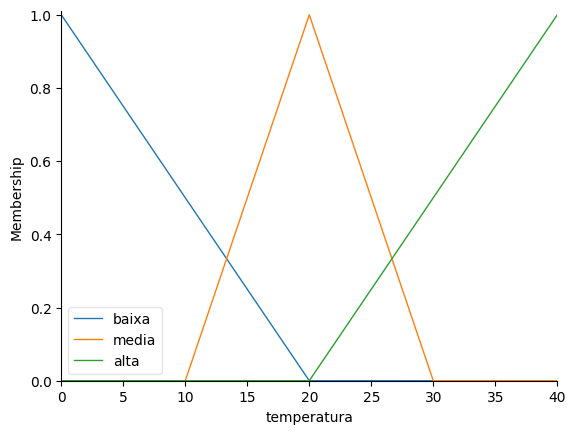

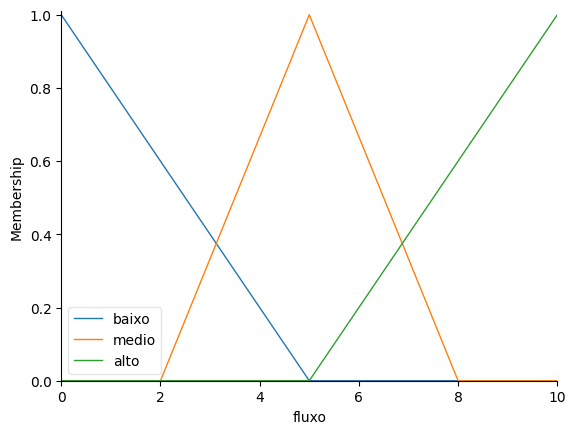

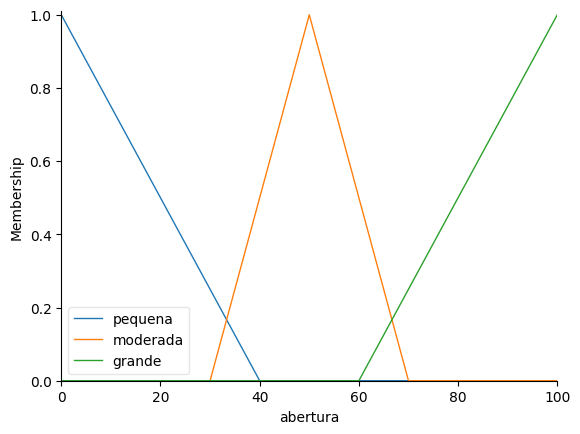

In [ ]:
# ---------------------------------------
# 5. Visualização das Funções de Pertinência
# ---------------------------------------

temperatura.view()
fluxo.view()
abertura.view()


In [ ]:
# ---------------------------------------
# 6. Base de Regras Fuzzy (Inferência Mamdani)
# ---------------------------------------

rule1 = ctrl.Rule(temperatura['baixa'] & fluxo['alto'], abertura['grande'])
rule2 = ctrl.Rule(temperatura['baixa'] & fluxo['medio'], abertura['moderada'])
rule3 = ctrl.Rule(temperatura['media'] & fluxo['alto'], abertura['moderada'])
rule4 = ctrl.Rule(temperatura['media'] & fluxo['baixo'], abertura['pequena'])
rule5 = ctrl.Rule(temperatura['alta'] & fluxo['baixo'], abertura['pequena'])
rule6 = ctrl.Rule(temperatura['alta'] & fluxo['alto'], abertura['moderada'])



In [ ]:
# ---------------------------------------
# 7. Sistema Fuzzy e Inferência
# ---------------------------------------

# Agregação das regras no ControlSystem
controle_chuveiro = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])

# Simulador para entradas de temperatura e fluxo
simulador = ctrl.ControlSystemSimulation(controle_chuveiro)


In [ ]:
# ---------------------------------------
# 8. Exemplo Prático de Simulação
# ---------------------------------------

# Exemplo: temperatura = 15°C e fluxo = 7 L/min
simulador.input['temperatura'] = 15
simulador.input['fluxo'] = 7

# Processamento das regras fuzzy
simulador.compute()


Abertura recomendada da válvula: 63.05%


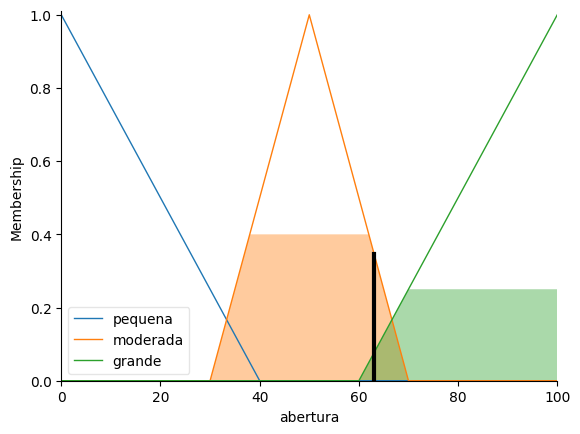

In [ ]:
# ---------------------------------------
# 9. Resultado da Saída (Defuzzificação - Método do Centroide)
# ---------------------------------------

print(f"Abertura recomendada da válvula: {simulador.output['abertura']:.2f}%")

# Visualização gráfica da defuzzificação
abertura.view(sim=simulador)


# ---------------------------------------
# 10. Considerações Finais
# ---------------------------------------

Neste exemplo, utilizamos:
- Fuzzificação com funções triangulares
- Inferência de Mamdani (mínimo para AND, máximo para OR)
- Agregação das regras pela união das saídas fuzzy
- Defuzzificação pelo método do centroide

A aplicação demonstrou como automatizar o controle de temperatura de um chuveiro
de forma eficiente e confortável ao usuário.
